# Exercise 04

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [44]:
import zipfile
with zipfile.ZipFile('../datasets/fraud_detection.csv.zip', 'r') as z:
    f = z.open('15_fraud_detection.csv')
    data = pd.io.parsers.read_table(f, index_col=0, sep=',')

In [45]:
data.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [46]:
data.shape, data.Label.sum(), data.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [47]:
X = data.drop(['Label'], axis=1)
y = data['Label']

# Exercice 04.1

Estimate a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

# CARGA DE LIBRERIA

In [48]:
from sklearn.linear_model import LogisticRegression

# DEFINICIÓN DE TRAIN Y TEST

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# INICIALIZACIÓN DE LA REGRESIÓN LOGÍSTICA

In [50]:
logreg = LogisticRegression(C=1e9)
logreg

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# ESTIMACIÓN DE PARÁMETROS

In [51]:
logreg.fit(X_train, y_train)
logreg.coef_

array([[-3.33527338e-03, -1.87247691e-02, -3.75488518e-02,
         1.15137647e-04, -1.05134703e-04, -7.54556543e-02,
        -6.09287863e-02, -9.10127688e-02, -8.65148240e-02,
        -7.50092459e-04, -7.44795275e-02, -4.75150924e-07,
        -9.74242334e-03, -5.54794946e-02, -9.61221865e-02]])

# PREDICCIÓN (PROBABILIDAD)

In [52]:
# predict probability of survival
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print(y_pred_prob)

[1.20743138e-02 2.98235990e-05 4.48915177e-03 ... 1.51274193e-02
 2.18850003e-02 4.33985850e-03]


# PREDICCIÓN (CLASE)

In [53]:
y_pred_class = logreg.predict(X_test)
print(y_pred_class)

[0 0 0 ... 0 0 0]


# EVALUACIÓN MEDIANTE Accuracy

In [54]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.9939736455119518


Dado el evidente desbalanceo de clases, la predicción de ceros se hace simple y por tanto se genera el acierto frente al conjunto test explicado un valor de Accuracy tan alto configurando asi una falacia 

# EVALUACIÓN MEDIANTE F1-Score

In [55]:
from sklearn import metrics
print(metrics.f1_score(y_test, y_pred_class))


0.0


C:\Users\anmag\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Si precision = TP / (TP + FP) y si el predictor no predice ninguna clase positiva en absoluto; la precisión sera 0.

Si recall = TP / (TP + FN), en caso de que el predictor no prediga la clase positiva - TP es 0 - recall sera es 0.

# EVALUACIÓN MEDIANTE F_Beta-Score (Beta=10)

In [56]:
print(metrics.fbeta_score(y_test, y_pred_class,10))

0.0


C:\Users\anmag\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


En consecuencia del desbalanceo de clases y la no predicción de clase positiva el valor devuelto sera 0. Con esto se hace necesario y conveniente balancear el conjunto de datos

# Exercice 04.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

# CARGA DE LIBRERIAS 

In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
plt.style.use('ggplot')

# Under-sample the negative class

In [58]:
# Reducción de dimensionalidad a 2 componentes principales
pca = PCA(n_components = 2)

# estimación y tranformación para visualizar en 2 ejes
x_vis = pca.fit_transform(X_train)

In [59]:
x_vis

array([[-2195.05093259,  -118.25153192],
       [-2230.89180094,  -122.75742487],
       [-2247.08359856,    -2.863442  ],
       ...,
       [-2340.23710144,   -85.4575715 ],
       [-2201.35460924,  -119.04393818],
       [-2185.01547103,  -117.07292273]])

# PLOT  ESTADO INICIAL CLASES DESBALANCEADAS

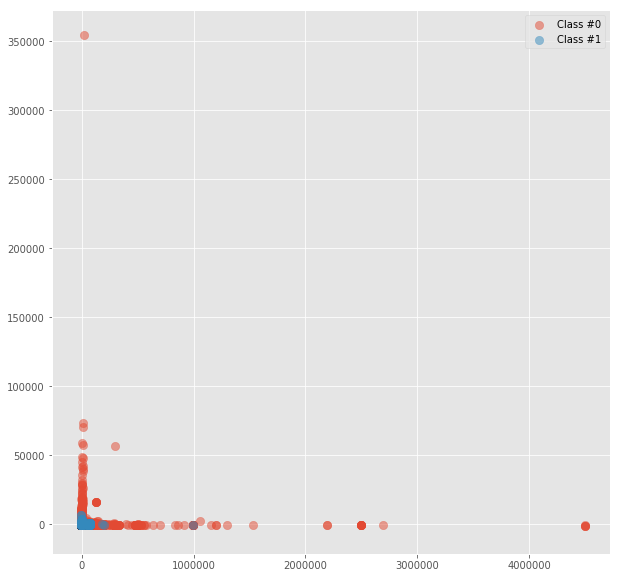

In [60]:
def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

plot_two_classes(x_vis, y_train)
plt.show()

Visualmente se observa una mayor presencia de valores 0 respecto la clase 1 síntoma de desbalanceo de clases

# DEFINICIÓN DE FUNCIÓN PARA EL BALANCEO DE CLASES

In [61]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

# BUCLE PARA EVALUAR EL COMPORTAMIENTO DEL TARGET PERCENTAGE

Target percentage 0.1
y.shape =  5867 y.mean() =  0.10022157831941367


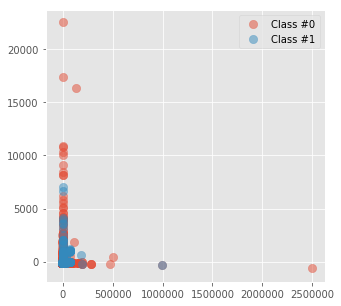

Target percentage 0.2
y.shape =  2939 y.mean() =  0.20006805035726438


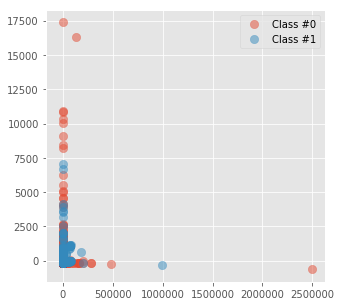

Target percentage 0.3
y.shape =  1920 y.mean() =  0.30625


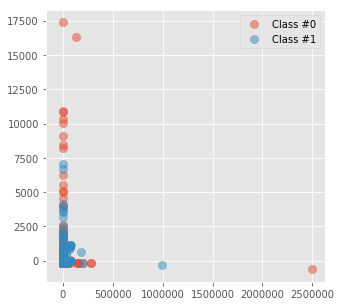

Target percentage 0.4
y.shape =  1430 y.mean() =  0.4111888111888112


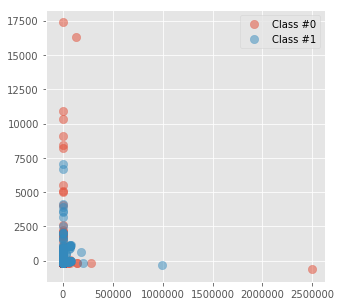

Target percentage 0.5
y.shape =  1151 y.mean() =  0.5108601216333623


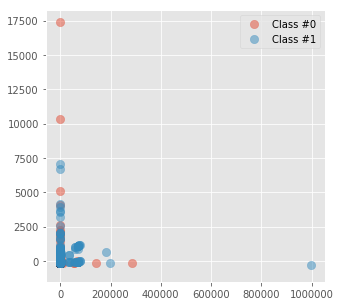

In [62]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(x_vis, y_train, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()  

A medida que se incrementa el valor del -target percentage- la clase con más valores empieza a decrecer

# Exercice 04.3

Now using random-over-sampling

# DEFINICIÓN DE FUNCIÓN OverSampling 

In [63]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X.iloc[filter_], y.iloc[filter_]

# DEFINICIÓN DEL NUEVO CONJUNTO DE DATOS

In [64]:
#Se selecciona 0.4 como porcentaje objetivo para balancear las clases
X_new, y_new = OverSampling(X_train, y_train, target_percentage = 0.4) 

# (%) DE VALORES POSITIVOS EN EL NUEVO CONJUNTO DE DATOS


In [65]:
n_pos = (y_new == 1).sum()
n_neg = (y_new == 0).sum()
float(n_pos)/(float(n_pos)+float(n_neg))

0.4

# INICIALIZACIÓN DE REGRESIÓN LOGÍSTICA

In [66]:
logreg_over       = LogisticRegression()

# ESTIMACIÓN DE PARÁMETROS

In [67]:
logreg_over_final = logreg_over.fit(X_new, y_new)
logreg_over_final

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# PREDICCCIÓN

In [68]:
y_pred_BAL = logreg_over_final.predict(X_test)
y_pred_BAL

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# ESTIMACIÓN DE MÉTRICAS

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
print('Accuracy',accuracy_score(y_test, y_pred_BAL))
print('precision',precision_score(y_test, y_pred_BAL))
print('recall',recall_score(y_test, y_pred_BAL))
print('f1 score', f1_score(y_test, y_pred_BAL))

Accuracy 0.8971194602231769
precision 0.02164625462831102
recall 0.36363636363636365
f1 score 0.040860215053763436


# Exercice 04.4*
Evaluate the results using SMOTE

Which parameters did you choose?

# DEFINICIÓN DE FUNCIÓN SMOTE

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X,y,random_state=2)

def SMOTE_MANUAL(X, y, target_percentage=0.5, k=5, seed=None):
    
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()
    
    #New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1].iloc[sel] - step * (X[y==1].iloc[sel] - X[y==1].iloc[nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y


In [ ]:
X_sm, y_sm = SMOTE_MANUAL(x_train, y_train, target_percentage=0.3, k=5)

In [ ]:
X_sm

# CONJUNTO DE DATOS BAJO SMOTE

In [ ]:
logreg.fit(X_s, y_s)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

from sklearn.metrics import  precision_score, recall_score,f1_score,fbeta_score

# calculate testing accuracy
from sklearn import metrics
print('Accuracy    ',metrics.accuracy_score(y_test, y_pred_class))

print('f1_score    ', f1_score(y_test, y_pred_class))

print('Beta_score B=10    ', fbeta_score(y_test, y_pred_class,10))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)

# Exercice 04.5

Estimate a Logistic Regression, GaussianNB, K-nearest neighbors and a Decision Tree **Classifiers**

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Combine the classifiers and comment

# CARGA DE LIBRERIAS

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# DEFINICIÓN DE DICCIONARIO PARA MODELOS 

In [83]:
models = {'lr': LogisticRegression(),
          'dt': DecisionTreeClassifier(),
          'nb': GaussianNB(),
          'Kn': KNeighborsClassifier()}

# ESTIMACIÓN DE MODELOS

In [84]:
for model in models.keys():
    models[model].fit(X_train, y_train)

# PREDICCIÓN DE MODELOS

In [85]:
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

# MÉTRICAS

In [86]:
# Evaluate each model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  precision_score, recall_score,f1_score,fbeta_score

for model in models.keys():
    print('RMSE              ',model,np.sqrt(mean_squared_error(y_pred[model], y_test)))
    print('Accuracy          ',model,metrics.accuracy_score(y_test, y_pred[model]))
    print('F1 Score          ',model,f1_score(y_test, y_pred[model]))
    print('Beta Score B=10   ',model,fbeta_score(y_test, y_pred[model],10))

RMSE               lr 0.07762959801550057
Accuracy           lr 0.9939736455119518
F1 Score           lr 0.0
Beta Score B=10    lr 0.0
RMSE               dt 0.10328923390211271
Accuracy           dt 0.9893313341599147
F1 Score           dt 0.14746543778801843
Beta Score B=10    dt 0.1529940828402367
RMSE               nb 0.09285168478853235
Accuracy           nb 0.9913785646319311
F1 Score           nb 0.0
Beta Score B=10    nb 0.0
RMSE               Kn 0.07910138016526676
Accuracy           Kn 0.9937429716559499
F1 Score           Kn 0.1422924901185771
Beta Score B=10    Kn 0.08680290297937356


C:\Users\anmag\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exercice 04.6

Using the under-sampled dataset

Evaluate a RandomForestClassifier and compare the results

change n_estimators=100, what happened

# CONJUNTO DE DATOS BAJO UNDER SAMPLING 

In [87]:
X_us, y_us = UnderSampling(X, y, 0.5, 1)

# INICIALIZACIÓN DE RANDOM FOREST

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [89]:
# ESTIMACIÓN RANDO FOREST

In [90]:
clf.fit(X_us, y_us)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# ESTIMACIÓN DE RMSE

In [95]:
# list of values to try for n_estimators
RMSE_scores = []
rfreg = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [96]:
RMSE_scores

[0.07620928564538625]

In [93]:
rfreg.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)